In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

2023-02-05 14:29:35.318875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-05 14:29:36.508844: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/users/eleves-a/2022/nguyen.vu/miniconda3/envs/test/lib/
2023-02-05 14:29:36.509276: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/users/eleves-a/2022/nguyen.vu/miniconda3/envs/test/lib/
2023-02-05 14:

In [7]:
apple = np.load('/users/eleves-a/2022/nguyen.vu/full_numpy_bitmap_apple.npy')
banana = np.load('/users/eleves-a/2022/nguyen.vu/full_numpy_bitmap_banana.npy')
carrot = np.load('/users/eleves-a/2022/nguyen.vu/full_numpy_bitmap_carrot.npy')
grapes = np.load('/users/eleves-a/2022/nguyen.vu/full_numpy_bitmap_grapes.npy')
print('number of pics, pixel size:')
print(apple.shape, banana.shape, carrot.shape, grapes.shape)

number of pics, pixel size:
(144722, 784) (307936, 784) (132459, 784) (155305, 784)


In [9]:
# add a column with labels, 0=apple, 1=banana, 2=carrot, 3=grapes
apple = np.c_[apple, np.zeros(len(apple))]
banana = np.c_[banana, np.ones(len(banana))]
carrot = np.c_[carrot, 2*np.ones(len(carrot))]
grapes = np.c_[grapes, 3*np.ones(len(grapes))]

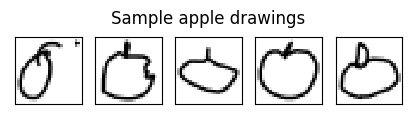

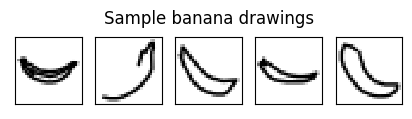

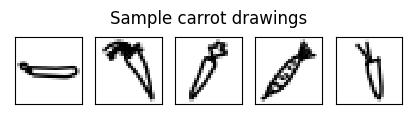

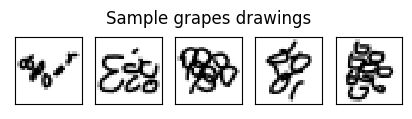

In [11]:
# Function to plot 28x28 pixel drawings that are stored in a numpy array.
# Arg: 
#   rows, cols:  how many rows and cols of pictures to display (default 1x5). 
#   title: title of the plot
def plot_samples(input_array, rows=1, cols=5, title=''):
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

plot_samples(apple, title='Sample apple drawings')
plot_samples(banana, title = 'Sample banana drawings')
plot_samples(carrot, title = 'Sample carrot drawings')
plot_samples(grapes, title = 'Sample grapes drawings')

In [18]:
# merge the arrays, and split the features (X) and labels (y). Convert to float32 to save some memory.
X = np.concatenate((apple[:10000,:-1], banana[:10000,:-1], carrot[:10000,:-1], grapes[:10000,:-1]), axis=0).astype('float32') # all columns but the last
y = np.concatenate((apple[:10000,-1], banana[:10000,-1], carrot[:10000,-1], grapes[:10000,-1]), axis=0).astype('float32') # the last column

# train/test split (50:50) (divide by 255 to obtain normalized values between 0 and 1)
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.5,random_state=0)
# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

# reshape to be [samples][pixels][width][height]
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [19]:
def cnn_model():    
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.2))
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
model = cnn_model()
history = model.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=30, batch_size=50)
# Final evaluation of the model
scores = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1]*100, "%")

# Save weights
model.save_weights('quickdraw_neuralnet.h5')
model.save('quickdraw.model')

2023-02-05 15:06:42.715697: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 15:06:42.724949: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 15:06:42.725110: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 15:06:42.725501: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Epoch 1/30


2023-02-05 15:06:46.225331: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-02-05 15:06:48.651047: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-02-05 15:06:55.886410: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-02-05 15:06:56.012631: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fe50119e6f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-05 15:06:56.012650: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2023-02-05 15:06:56.076357: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:26

400/400 [==============================] - 15s 3ms/step - loss: 0.3495 - accuracy: 0.8801 - val_loss: 0.2172 - val_accuracy: 0.9290
Epoch 2/30
400/400 [==============================] - 1s 3ms/step - loss: 0.2125 - accuracy: 0.9308 - val_loss: 0.1786 - val_accuracy: 0.9421
Epoch 3/30
400/400 [==============================] - 1s 3ms/step - loss: 0.1777 - accuracy: 0.9430 - val_loss: 0.1931 - val_accuracy: 0.9420
Epoch 4/30
400/400 [==============================] - 1s 3ms/step - loss: 0.1537 - accuracy: 0.9503 - val_loss: 0.1438 - val_accuracy: 0.9538
Epoch 5/30
400/400 [==============================] - 1s 3ms/step - loss: 0.1350 - accuracy: 0.9545 - val_loss: 0.1326 - val_accuracy: 0.9564
Epoch 6/30
400/400 [==============================] - 1s 3ms/step - loss: 0.1228 - accuracy: 0.9607 - val_loss: 0.1310 - val_accuracy: 0.9581
Epoch 7/30
400/400 [==============================] - 1s 3ms/step - loss: 0.1103 - accuracy: 0.9628 - val_loss: 0.1326 - val_accuracy: 0.9595
Epoch 8/30
400/4

INFO:tensorflow:Assets written to: quickdraw.model/assets


INFO:tensorflow:Assets written to: quickdraw.model/assets


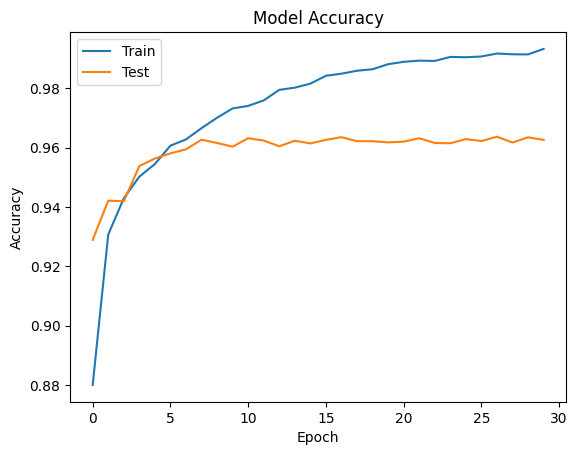

In [24]:
# Plotting the history of accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

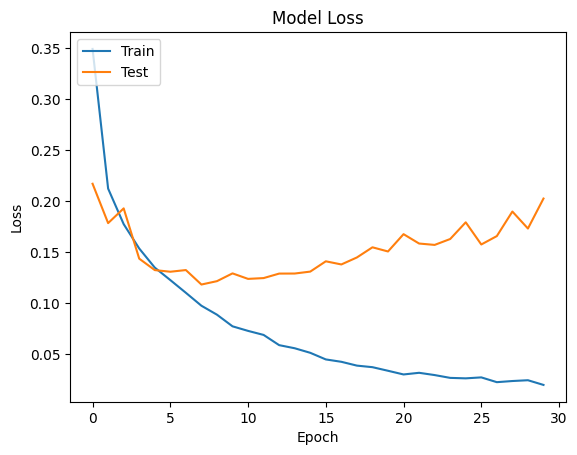

In [25]:
# Plotting the history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [26]:
model = load_model('quickdraw.model')
model.summary()

img_width = 28
img_height = 28

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 15)          0         
                                                                 
 flatten (Flatten)           (None, 375)               0

The drawing is identified as -->  banana  <-- with a probability of  100.0
The drawing is identified as -->  banana  <-- with a probability of  100.0
The drawing is identified as -->  apple  <-- with a probability of  99.9998927116394
The drawing is identified as -->  apple  <-- with a probability of  100.0
The drawing is identified as -->  grapes  <-- with a probability of  100.0
The drawing is identified as -->  banana  <-- with a probability of  100.0
The drawing is identified as -->  carrot  <-- with a probability of  100.0
The drawing is identified as -->  banana  <-- with a probability of  100.0
The drawing is identified as -->  carrot  <-- with a probability of  100.0
The drawing is identified as -->  grapes  <-- with a probability of  99.9998927116394


/tmp/ipykernel_3903/3246222395.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot2grid((10, 5), (i, 0), colspan=4)


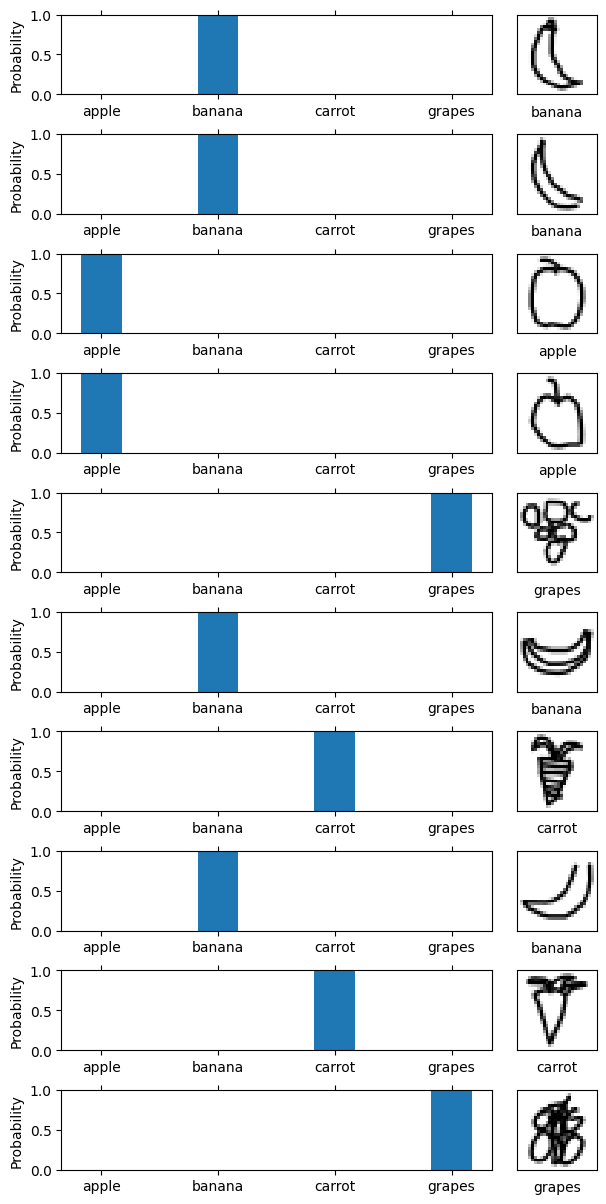

In [29]:
# store the label codes in a dictionary
label_dict = {0:'apple', 1:'banana', 2:'carrot', 3:'grapes'}

#print X_test_cnn[0]
# CNN predictions
cnn_probab = model.predict(X_test_cnn, batch_size=32, verbose=0)
#print cnn_probab[4]

# Plotting the X_test data and finding out the probabilites of prediction
fig, ax = plt.subplots(figsize=(7,15))

for i in list(range(10)):
    print("The drawing is identified as --> ", label_dict[y_test[i]], " <-- with a probability of ", max(cnn_probab[i])*100)
    
    # plot probabilities:
    ax = plt.subplot2grid((10, 5), (i, 0), colspan=4)
    plt.bar(np.arange(4), cnn_probab[i], 0.35, align='center')
    plt.xticks(np.arange(4), ['apple','banana','carrot','grapes'])
    plt.tick_params(axis='x', bottom='off', top='off')
    plt.ylabel('Probability')
    plt.ylim(0,1)
    plt.subplots_adjust(hspace = 0.5)

    # plot picture:
    ax = plt.subplot2grid((10, 5), (i, 4), colspan=1)
    plt.imshow(X_test[i].reshape((28,28)),cmap='gray_r', interpolation='nearest')
    plt.xlabel(label_dict[y_test[i]]); # get the label from the dict
    plt.xticks([])
    plt.yticks([])